# Carga de datos

In [79]:
import numpy as pn
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Datasets/movies_metadata.csv")


data = data[['adult','production_companies', 'genres', 'runtime', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue']]
data


C:\Users\dekna\AppData\Local\Temp\ipykernel_32664\1370961970.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Datasets/movies_metadata.csv")


,adult,production_companies,genres,runtime,vote_average,vote_count,popularity,budget,revenue
0,False,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,7.7,5415.0,21.946943,30000000,373554033.0
1,False,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,6.9,2413.0,17.015539,65000000,262797249.0
2,False,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,6.5,92.0,11.7129,0,0.0
3,False,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,6.1,34.0,3.859495,16000000,81452156.0
4,False,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'id': 35, 'name': 'Comedy'}]",106.0,5.7,173.0,8.387519,0,76578911.0
...,...,...,...,...,...,...,...,...,...
45461,False,[],"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",90.0,4.0,1.0,0.072051,0,0.0
45462,False,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'id': 18, 'name': 'Drama'}]",360.0,9.0,3.0,0.178241,0,0.0
45463,False,"[{'name': 'American World Pictures', 'id': 6165}]","[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",90.0,3.8,6.0,0.903007,0,0.0
45464,False,"[{'name': 'Yermoliev', 'id': 88753}]",[],87.0,0.0,0.0,0.003503,0,0.0


**Convertir columnas string en float con codficador**

In [66]:
"""import pandas as pd
from sklearn.preprocessing import LabelEncoder
array_numpy = data['genres'].values
print(array_numpy)
# convertir el array de numpy a pd.series
series_pd = pd.Series(array_numpy)
print(series_pd)"""

"import pandas as pd\nfrom sklearn.preprocessing import LabelEncoder\narray_numpy = data['genres'].values\nprint(array_numpy)\n# convertir el array de numpy a pd.series\nseries_pd = pd.Series(array_numpy)\nprint(series_pd)"

**Convertir columnas string en float con one hot encoding**

In [67]:
"""df_one_hot = pd.get_dummies(data['adult'])
print(df_one_hot)"""

"df_one_hot = pd.get_dummies(data['adult'])\nprint(df_one_hot)"

# Limpieza de datos

**Gestión datos faltantes**

In [88]:
data = data.dropna()  # Elimina las filas que contienen valores nulos o NaN (Not a Number) en el DataFrame
nan = data.isnull().sum(axis=0)
print(nan)  # Imprime el número de valores nulos en cada columna del DataFrame

budget     0
revenue    0
dtype: int64


**Matriz de correlacion de variables**

In [ ]:
import pandas as pd
# Calcular la matriz de correlación
#corr = data[['runtime', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue']].corr()
#corr

data2 = data[['budget','revenue']]
nan = data2.isnull().sum(axis=0)

data2

,budget,revenue
0,30000000,373554033.0
1,65000000,262797249.0
2,0,0.0
3,16000000,81452156.0
4,0,76578911.0
...,...,...
45461,0,0.0
45462,0,0.0
45463,0,0.0
45464,0,0.0


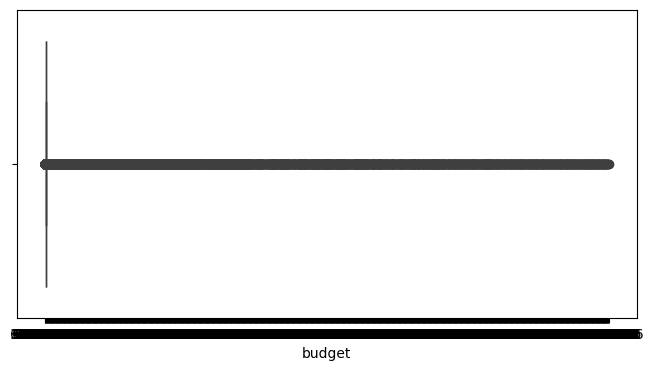

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U1'), dtype('<U1')) -> None

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 4))
sns.boxplot(x=data2['budget'])
plt.show()

# Calcular cuartiles
q1 = np.percentile(data2['budget'], 25)  # Primer cuartil (Q1)
q3 = np.percentile(data2['budget'], 75)  # Tercer cuartil (Q3)
iqr = q3 - q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrar outliers
outliers = data2[(data2['budget'] < limite_inferior) | (data2['budget'] > limite_superior)]
print("Outliers encontrados:\n", outliers) # Los valores que están fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR] se consideran outliers.